[toc]

# 一、准备数据

In [35]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


%config InlineBackend.figure_format = 'png'

sns.__version__

'0.12.2'

In [36]:
train_data = pd.read_csv('./data/DataAnalysisSample.csv')

In [37]:
# 类型特征
categorical_features = train_data.dtypes[train_data.dtypes == 'object'].index
# 数字特征
numeric_features =train_data.dtypes[train_data.dtypes != 'object'].index

categorical_features, numeric_features

(Index(['Address', 'Summary', 'Type', 'Heating', 'Cooling', 'Parking',
        'Bedrooms', 'Region', 'Elementary School', 'Middle School',
        'High School', 'Flooring', 'Heating features', 'Cooling features',
        'Appliances included', 'Laundry features', 'Parking features',
        'Listed On', 'Last Sold On', 'City', 'State'],
       dtype='object'),
 Index(['Id', 'Sold Price', 'Year built', 'Lot', 'Bathrooms', 'Full bathrooms',
        'Total interior livable area', 'Total spaces', 'Garage spaces',
        'Elementary School Score', 'Elementary School Distance',
        'Middle School Score', 'Middle School Distance', 'High School Score',
        'High School Distance', 'Tax assessed value', 'Annual tax amount',
        'Listed Price', 'Last Sold Price', 'Zip'],
       dtype='object'))

In [38]:
train_data.shape

(500, 41)

# 2、单变量可视化

## 2.1 直方图
直方图依照相等的间隔将值分组为柱，它的形状可能包含了数据分布的一些信息，如高斯分布、指数分布等。当分布总体呈现规律性，但有个别异常值时，你可以通过直方图辨认出来。当你使用的机器学习方法预设了某一特定分布类型（通常是高斯分布）时，知道特征值的分布是非常重要的。

### 2.1.1 DataFrame的hist()方法
最简单的查看数值变量分布的方法是使用 DataFrame 的hist() 方法绘制直方图。

`
DataFrame.hist(column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=10, backend=None, legend=False, **kwargs)[source]`

<Axes: xlabel='Total interior livable area', ylabel='Count'>

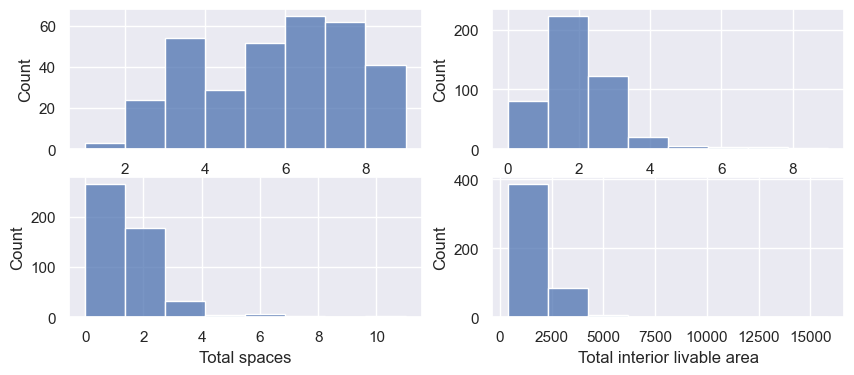

In [39]:
_, axes= plt.subplots( 2, 2,  figsize=(10,4))
sns.histplot(train_data['Middle School Score'], kde = False, bins=8, ax=axes[0,0])
sns.histplot(train_data['Bathrooms'], kde = False, bins=8, ax=axes[0,1])
sns.histplot(train_data['Total spaces'], kde = False, bins=8, ax=axes[1,0])
sns.histplot(train_data['Total interior livable area'], kde = False, bins=8, ax=axes[1,1])


## 2.2 密度图
使用 seaborn 的  distplot() 方法观测数值变量的分布。默认情况下，该方法将同时显示直方图和密度图。

<Axes: xlabel='Total interior livable area', ylabel='Count'>

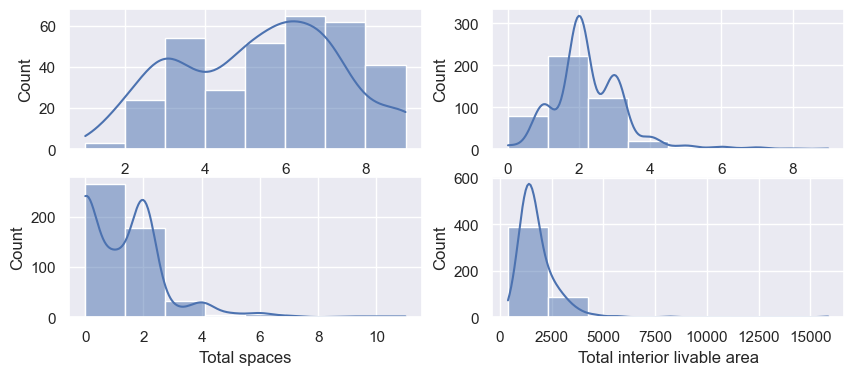

In [40]:
_, axes= plt.subplots( 2, 2,  figsize=(10,4))
sns.histplot(train_data['Middle School Score'], kde = True, bins=8, ax=axes[0,0])
sns.histplot(train_data['Bathrooms'], kde = True, bins=8, ax=axes[0,1])
sns.histplot(train_data['Total spaces'], kde = True, bins=8, ax=axes[1,0])
sns.histplot(train_data['Total interior livable area'], kde = True, bins=8, ax=axes[1,1])

## 2.3 箱形图
箱形图的主要组成部分是箱子（box），须（whisker）和一些单独的数据点（离群值），分别简单介绍如下：

箱子显示了分布的四分位距，它的长度由 25𝑡ℎ（Q1，下四分位数） 和 75𝑡ℎ（Q3，上四分位数） 决定，箱中的水平线表示中位数 （50%）。
须是从箱子处延伸出来的线，它们表示数据点的总体散布，具体而言，是位于区间 （Q1−1.5⋅IQR,Q3+1.5⋅IQR）的数据点，其中 IQR=Q3−Q1，也就是四分位距。
离群值是须之外的数据点，它们作为单独的数据点，沿着中轴绘制。
使用 seaborn 的 boxplot() 方法绘制箱形图


<Axes: >

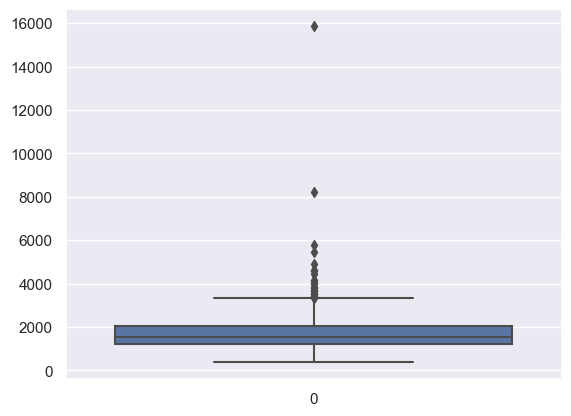

In [41]:
sns.boxplot(train_data['Total interior livable area'])

<Axes: xlabel='Bathrooms', ylabel='Total interior livable area'>

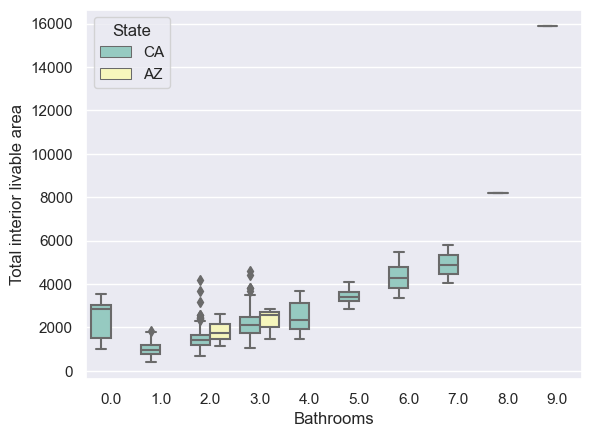

In [42]:
sns.boxplot(x ='Bathrooms',  y = 'Total interior livable area', data = train_data, hue= 'State', palette='Set3' )

## 2.4 提琴图
提琴形图和箱形图的区别是，提琴形图聚焦于平滑后的整体分布，而箱形图显示了单独样本的特定统计数据。

使用 violinplot() 方法绘制提琴形图。下图左侧是箱形图，右侧是提琴形图。

<Axes: >

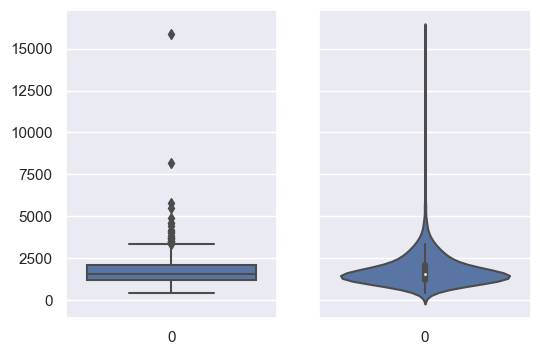

In [43]:
_, axes = plt.subplots(1,2,sharey=True, figsize=(6,4))
sns.boxplot(data=train_data["Total interior livable area"], ax=axes[0])
sns.violinplot(data=train_data["Total interior livable area"], ax=axes[1])

## 2.5 条形图@类别特征-sns.countplot()
频率表的图形化表示是条形图。创建条形图最简单的方法是使用 seaborn的   countplot() 函数。让我们来画出两个分类变量的分布。

`seaborn.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)`

<Axes: xlabel='Total spaces', ylabel='Count'>

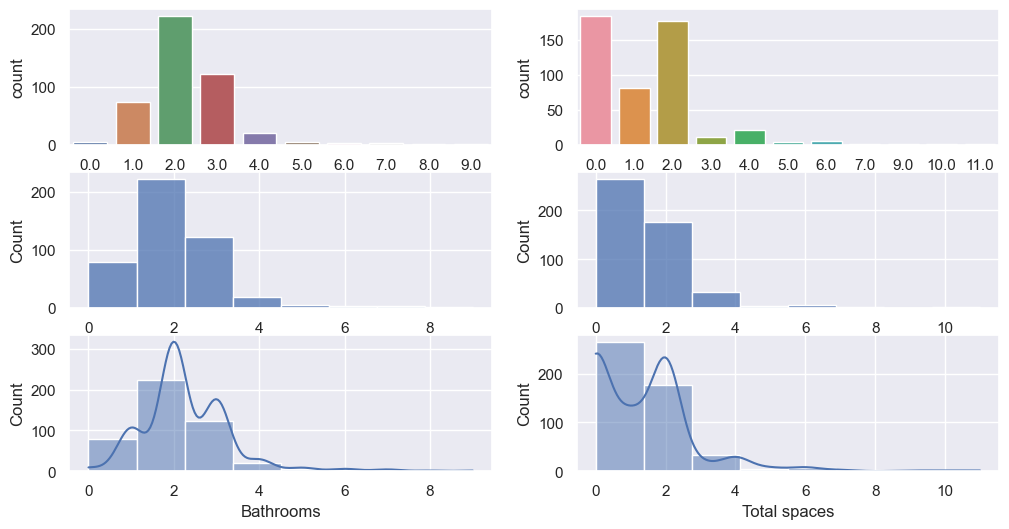

In [44]:
_, axes = plt.subplots(nrows=3,ncols=2,figsize=(12,6))
sns.countplot(x="Bathrooms",data=train_data,ax=axes[0,0])   # 条形图
sns.countplot(x="Total spaces", data=train_data, ax=axes[0,1])  # 条形图
sns.histplot(x="Bathrooms",data=train_data, kde = False, bins=8,ax=axes[1,0])      # 直方图
sns.histplot(x="Total spaces", data=train_data, kde = False, bins=8, ax=axes[1,1]) # 直方图
sns.histplot(train_data['Bathrooms'], kde = True, bins=8, ax=axes[2,0])      # 密度图
sns.histplot(train_data['Total spaces'], kde = True, bins=8, ax=axes[2,1])   # 密度图

## 2.6 频率图

In [45]:
train_data['Bathrooms'].value_counts()

Bathrooms
2.0    223
3.0    123
1.0     74
4.0     20
5.0      6
0.0      6
6.0      4
7.0      3
8.0      1
9.0      1
Name: count, dtype: int64

# 3、多变量可视化
多变量（multivariate）图形可以在单张图像中查看两个以上变量的联系，和单变量图形一样，可视化的类型取决于将要分析的变量的类型。

## 3.1 数值与数值特征

### 3.1.1 相关矩阵相关矩阵-corr()和heatmap()
相关矩阵可揭示数据集中的数值变量的相关性。这一信息很重要，因为有一些机器学习算法（比如，线性回归和逻辑回归）不能很好地处理高度相关的输入变量。

首先，我们使用 DataFrame 的  corr() 方法计算出每对特征间的相关性。接着，我们将所得的相关矩阵（correlation matrix）传给 seaborn 的  heatmap()方法，该方法根据提供的数值，渲染出一个基于色彩编码的矩阵。

`seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annotkws=None, linewidths=0, linecolor='white', cbar=True, cbarkws=None, cbar_ax=None, square=False, ax=None, xticklabels=True, yticklabels=True, mask=None, **kwargs) `

<Axes: >

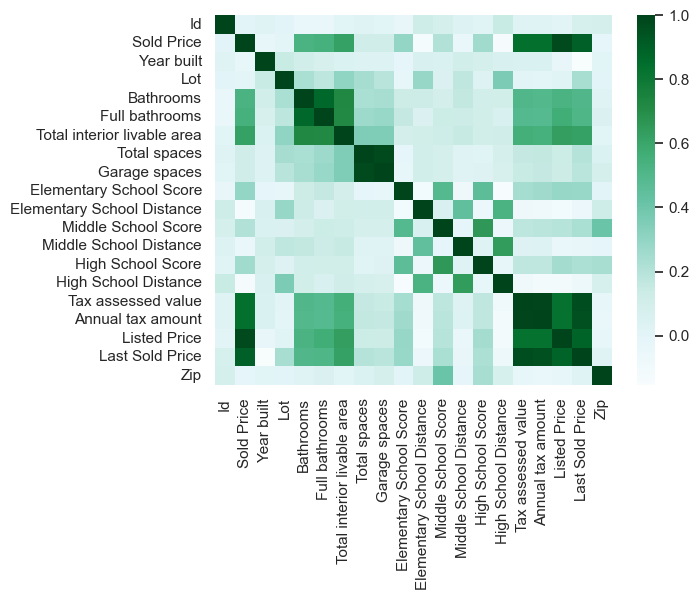

In [46]:
numeric_features

corr_df = train_data[numeric_features].corr()
sns.heatmap(corr_df, cmap='BuGn') # https://blog.csdn.net/weixin_41391619/article/details/115719116

### 3.1.2 散点图-plt.scatter()或sns.jointplot()
散点图（scatter plot）将两个数值变量的值显示为二维空间中的笛卡尔坐标（Cartesian coordinate）。

3.1.2.1 matplotlib方法-plt.scatter()

通过 matplotlib 库的  scatter() 方法可以绘制散点图。

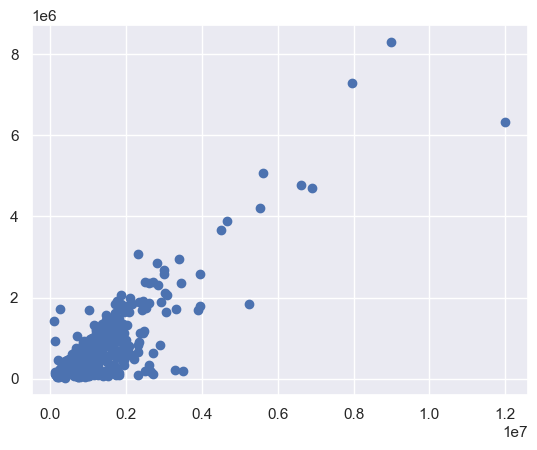

In [47]:
plt.scatter( train_data['Sold Price'], train_data['Tax assessed value'] )

3.1.2.2 seaborn方法-sns.jointplot()

seaborn 库的  jointplot() 方法在绘制散点图的同时会绘制两张直方图，某些情形下它们可能会更有用。

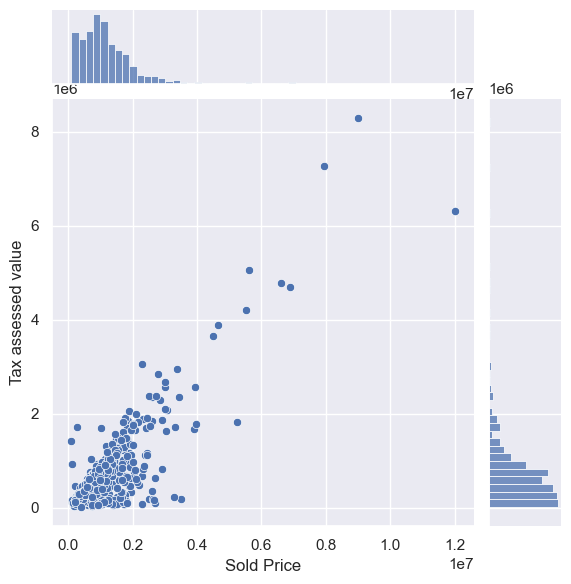

In [48]:
sns.jointplot(x='Sold Price', y = 'Tax assessed value', data=train_data, kind='scatter')

还可以绘制平滑过的散点直方图

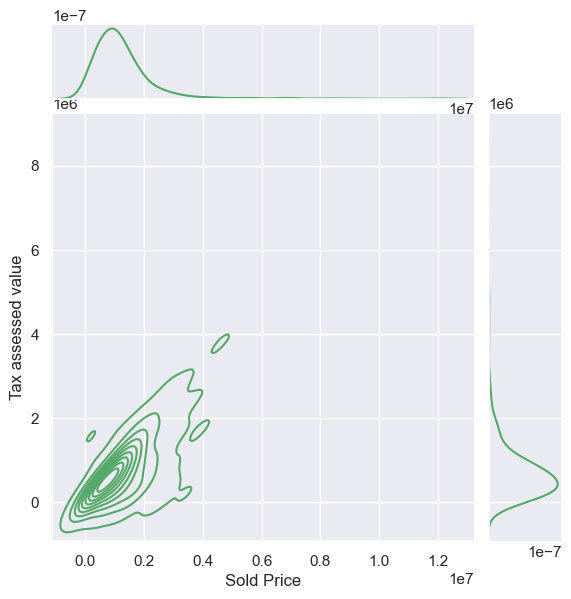

In [49]:
sns.jointplot(x='Sold Price', y = 'Tax assessed value', data=train_data, kind='kde', color= 'g')

### 3.1.3 散点图矩阵-sns.pairplot()
在某些情形下，我们可能想要绘制如下所示的散点图矩阵（scatterplot matrix）。它的对角线包含变量的分布，并且每对变量的散点图填充了矩阵的其余部分。

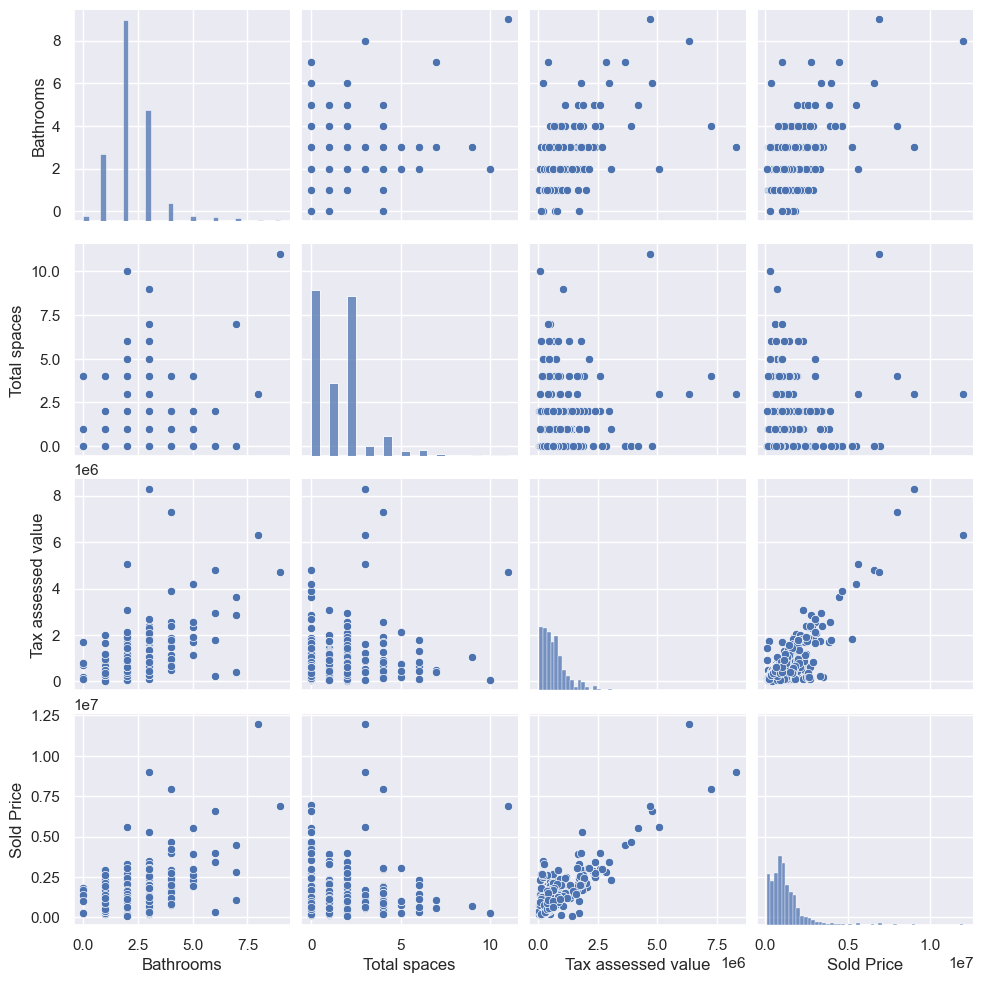

In [50]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(train_data[['Bathrooms','Total spaces','Tax assessed value','Sold Price']])

## 3.2 数值和类别的可视化

### 3.2.1 散点图-sns.lmplot()
为了让图形更有趣一点，可以尝试从数值和类别特征的相互作用中得到预测 Churn 的新信息，更具体地，让我们看看输入变量和目标变量 Churn 的关系。使用  lmplot() 方法的 hue 参数来指定感兴趣的类别特征。

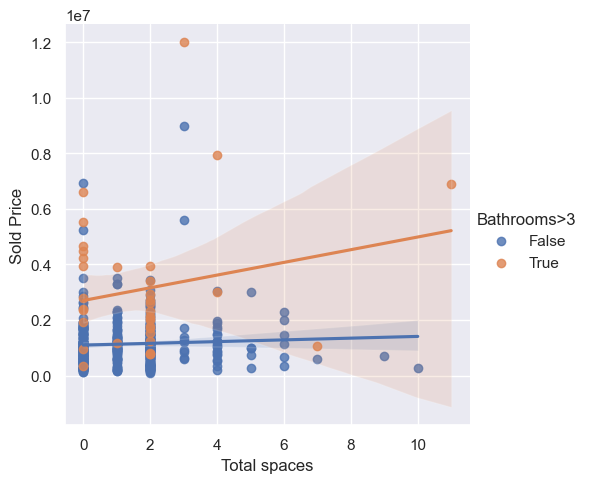

In [51]:
train_data['Bathrooms>3'] = train_data['Bathrooms'] > 3   # 增加一列类别， 便于演示

sns.lmplot(x = 'Total spaces',y ='Sold Price', data = train_data, hue = 'Bathrooms>3', fit_reg = True)


### 3.2.2 箱线图-sns.boxplot()

<Axes: xlabel='Bathrooms>3', ylabel='Sold Price'>

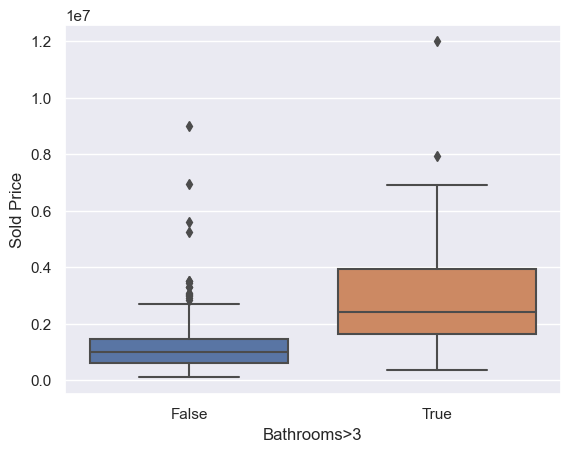

In [52]:

sns.boxplot(x='Bathrooms>3', y='Sold Price', data=train_data)

### 3.2.3 提琴形图-sns.violinplot()

<Axes: xlabel='Bathrooms>3', ylabel='Sold Price'>

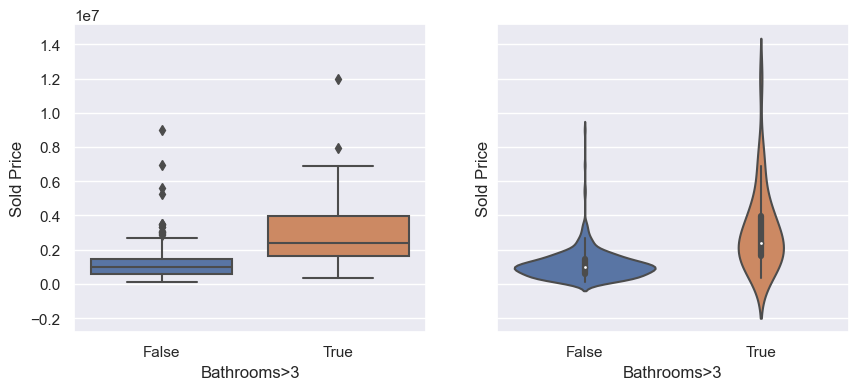

In [53]:

_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
 
sns.boxplot(x='Bathrooms>3', y='Sold Price', data=train_data, ax=axes[0])
sns.violinplot(x='Bathrooms>3', y='Sold Price', data=train_data, ax=axes[1])


## ​3.3 类别与类别可视化

### 3.3.1 条形图-countplot()

<Axes: xlabel='Total spaces', ylabel='count'>

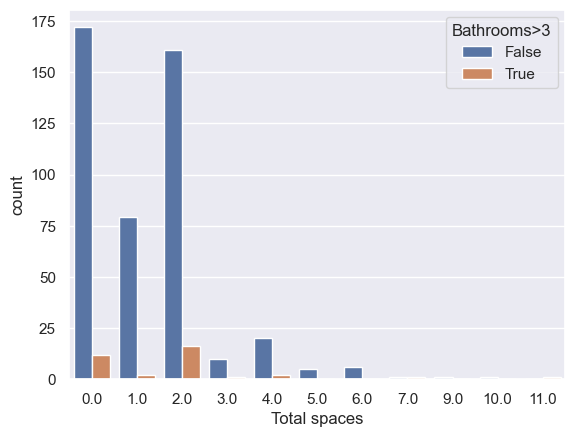

In [54]:
sns.countplot(x ='Total spaces' , hue='Bathrooms>3', data= train_data)

### 3.3.2 交叉表-crosstab()
交叉表（cross tabulation），即使用表格形式表示多个类别变量的频率分布。通过它可以查看某一列或某一行以了解某个变量在另一变量的作用下的分布情况。

In [55]:
pd.crosstab( train_data['Bathrooms>3'],train_data['Total spaces'])

Total spaces,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,9.0,10.0,11.0
Bathrooms>3,,,,,,,,,,,
False,172,79,161,10,20,5,6,1,1,1,0
True,12,2,16,1,2,0,0,1,0,0,1


### 3.3.3 类中统计值评估图-sns.catplot()

### 3.3.4 结构化多绘图网格-FacetGrid()

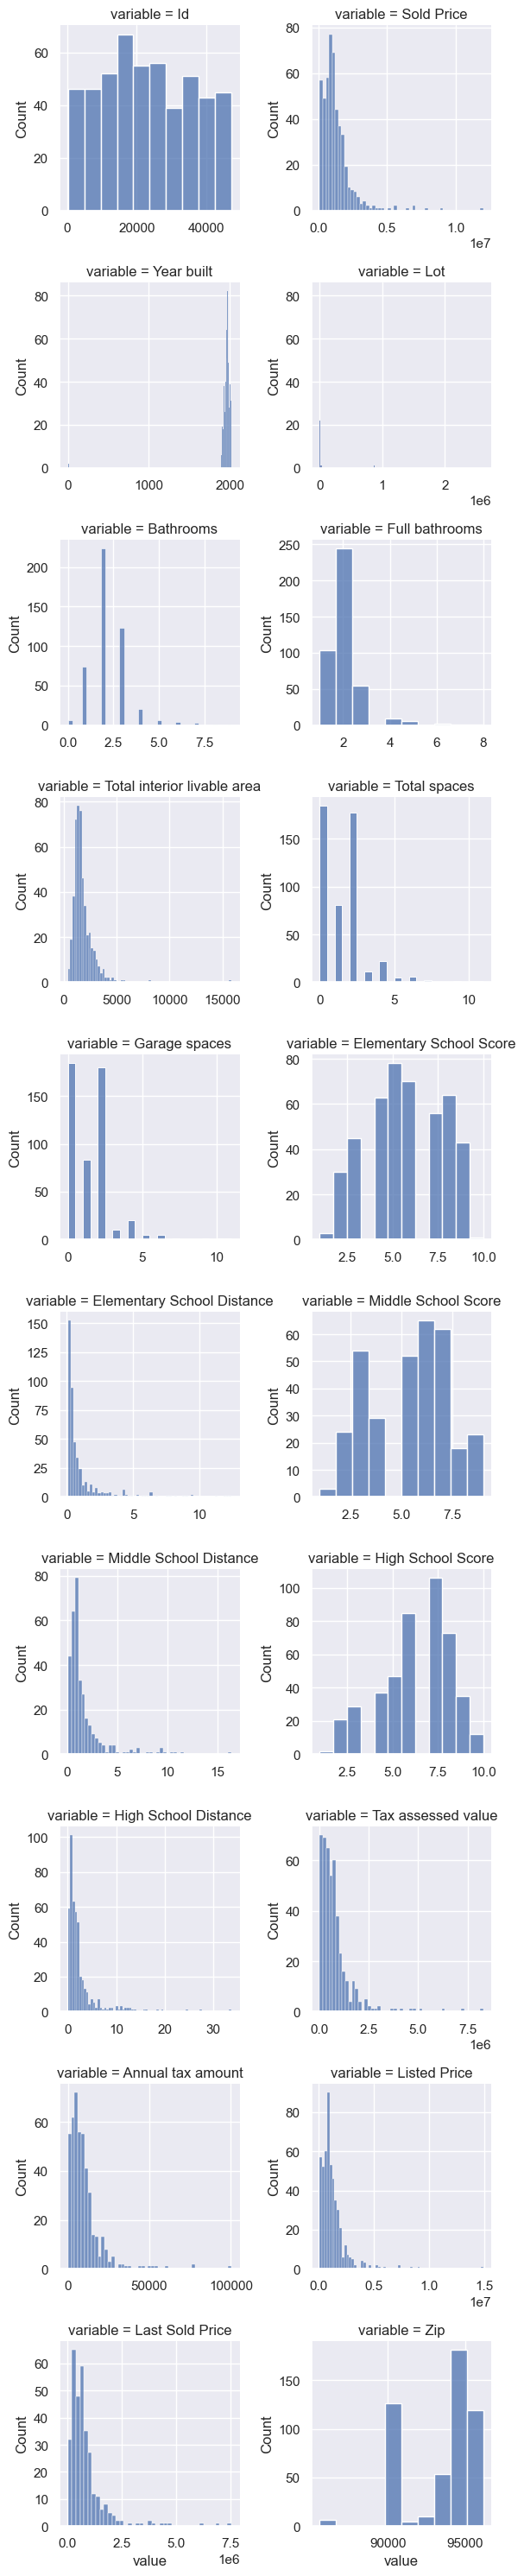

In [56]:
f = pd.melt(train_data, value_vars=numeric_features)  # 转换为长数据
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.histplot, "value")  ##

# ​4、全局数据集可视化

## 4.1 降维

## 4.2 t-SNE

# 5、其他可视化

## 5.1 分类边界-plt.pcolormesh()

## 5.2 绘制分类轮廓-plt.countour()

4.1.2 类别特征可视化

boxplot箱形图可视化：

4.2.1 单变量可视化
2.1 直方图@数值特征
直方图依照相等的间隔将值分组为柱，它的形状可能包含了数据分布的一些信息，如高斯分布、指数分布等。当分布总体呈现规律性，但有个别异常值时，你可以通过直方图辨认出来。当你使用的机器学习方法预设了某一特定分布类型（通常是高斯分布）时，知道特征值的分布是非常重要的。


4.2.2 多变量可视化

4.2.2.1 相关性分析
变量之间存在多重共线性的情况下会影响模型的精度，这里用相关矩阵corr()和热力图heatmap()可以直观地观察变量之间的相关关系，进而判断是否要对自变量进行删除，或者降维的操作

相关矩阵可揭示数据集中的数值变量的相关性。这一信息很重要，因为有一些机器学习算法（比如，线性回归和逻辑回归）不能很好地处理高度相关的输入变量。

首先，我们使用 DataFrame 的  corr() 方法计算出每对特征间的相关性。接着，我们将所得的相关矩阵（correlation matrix）传给 seaborn 的  heatmap()方法，该方法根据提供的数值，渲染出一个基于色彩编码的矩阵。

corr()是相关矩阵，是DataFrame内置函数，不用另外调包也能生成；

corr()括号里面没有填参数时默认是皮尔逊相关系数，corr(method = 'pearson')；
corr(method = 'spearman')，斯皮尔曼等级相关系数，用来分析非正态分布的数据；
corr(method = 'kendall')，秩相关系数，用来分析两定序变量相关关系；

In [57]:

class_numeric_feature = train_data[numeric_features]
correlation = class_numeric_feature.corr()      #查看各数字特征与价格之间相关性
correlation


,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
Id,1.000000,0.000333,0.026485,0.009471,-0.047630,-0.039855,0.013814,0.030316,0.016370,-0.035269,0.118621,0.084571,0.036666,0.021325,0.145187,0.029496,0.023010,0.007576,0.077293,0.083953
Sold Price,0.000333,1.000000,-0.023517,-0.003552,0.532194,0.546990,0.620870,0.115624,0.115429,0.294370,-0.127053,0.207089,-0.042749,0.259795,-0.133867,0.841349,0.840453,0.974193,0.897197,-0.009531
Year built,0.026485,-0.023517,1.000000,0.143593,0.106538,0.073144,0.045043,0.039189,0.037286,-0.015363,0.065508,0.061489,0.103645,0.087541,0.070217,0.055342,0.055694,-0.031106,-0.154189,0.014935
Lot,0.009471,-0.003552,0.143593,1.000000,0.230797,0.175956,0.302076,0.242299,0.190816,-0.026730,0.285994,0.053106,0.166283,0.033092,0.363036,0.003617,-0.005021,0.018249,0.233693,0.001925
Bathrooms,-0.047630,0.532194,0.106538,0.230797,1.000000,0.869886,0.722816,0.232691,0.234643,0.133287,0.129433,0.097933,0.165060,0.104276,0.110741,0.504067,0.495197,0.531158,0.506371,0.021796
Full bathrooms,-0.039855,0.546990,0.073144,0.175956,0.869886,1.000000,0.719973,0.268415,0.278644,0.156034,0.052699,0.137472,0.126110,0.108218,0.066053,0.488600,0.482601,0.566007,0.512067,0.049675
Total interior livable area,0.013814,0.620870,0.045043,0.302076,0.722816,0.719973,1.000000,0.353730,0.348345,0.097642,0.111747,0.118975,0.151861,0.111353,0.114928,0.554187,0.540777,0.632701,0.617700,0.015600
Total spaces,0.030316,0.115624,0.039189,0.242299,0.232691,0.268415,0.353730,1.000000,0.976163,-0.017315,0.106074,0.085606,0.024222,0.019491,0.090762,0.154706,0.164317,0.135011,0.201500,0.044982
Garage spaces,0.016370,0.115429,0.037286,0.190816,0.234643,0.278644,0.348345,0.976163,1.000000,-0.019771,0.102032,0.089275,0.025910,0.031397,0.073744,0.146611,0.154822,0.134180,0.188359,0.081820
Elementary School Score,-0.035269,0.294370,-0.015363,-0.026730,0.133287,0.156034,0.097642,-0.017315,-0.019771,1.000000,-0.101917,0.490333,-0.078074,0.461044,-0.143940,0.245354,0.260976,0.286088,0.281628,0.000936


In [58]:
print(correlation['Sold Price'].sort_values(ascending = False),'\n') 

Sold Price                     1.000000
Listed Price                   0.974193
Last Sold Price                0.897197
Tax assessed value             0.841349
Annual tax amount              0.840453
Total interior livable area    0.620870
Full bathrooms                 0.546990
Bathrooms                      0.532194
Elementary School Score        0.294370
High School Score              0.259795
Middle School Score            0.207089
Total spaces                   0.115624
Garage spaces                  0.115429
Id                             0.000333
Lot                           -0.003552
Zip                           -0.009531
Year built                    -0.023517
Middle School Distance        -0.042749
Elementary School Distance    -0.127053
High School Distance          -0.133867
Name: Sold Price, dtype: float64 



如果发现字段太多，要找到强相关关系的字段并不是很容易。需要再配合热力图使用。

<Axes: title={'center': 'Correlation of Numeric Features with hours-per-week'}>

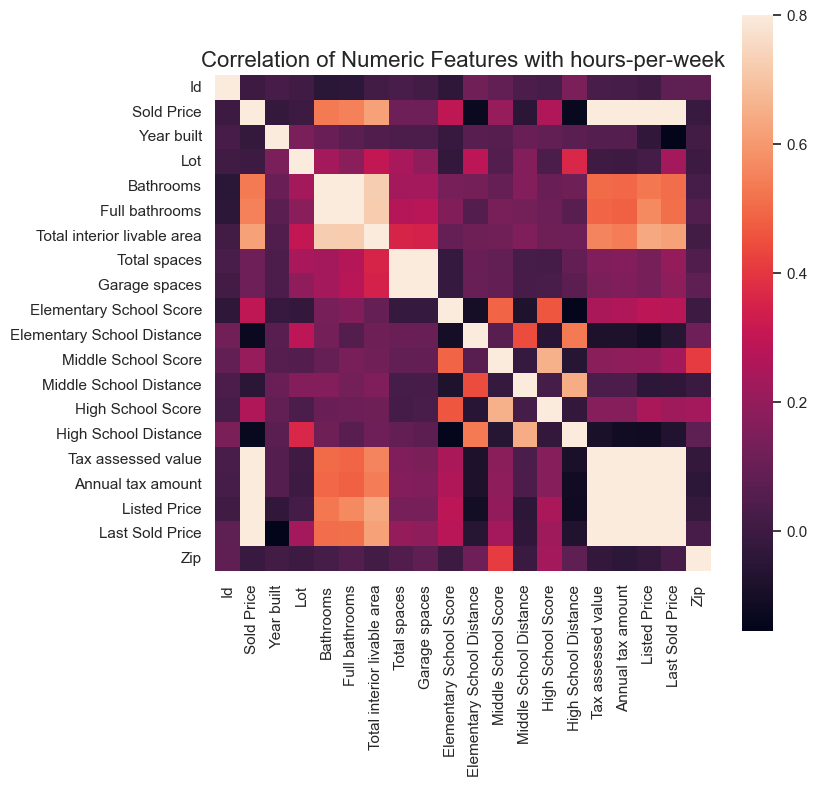

In [59]:
f , ax = plt.subplots(figsize = (8, 8))
plt.title('Correlation of Numeric Features with hours-per-week',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

 转为热力图就非常直观啦：从右侧可以了解越接近白色的部分代表相关系数越高，有几个字段是具有强相关性的，需要进行删除或者降维操作。

4.2.2查看数字特征的偏度和峰值

In [60]:
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train_data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train_data[col].kurt())  
         )

Id              Skewness: 00.11     Kurtosis: -01.11
Sold Price      Skewness: 03.90     Kurtosis: 024.29
Year built      Skewness: -14.42     Kurtosis: 218.50
Lot             Skewness: 09.73     Kurtosis: 104.50
Bathrooms       Skewness: 01.76     Kurtosis: 006.96
Full bathrooms  Skewness: 02.11     Kurtosis: 009.04
Total interior livable area Skewness: 05.86     Kurtosis: 066.18
Total spaces    Skewness: 02.01     Kurtosis: 007.52
Garage spaces   Skewness: 02.07     Kurtosis: 008.42
Elementary School Score Skewness: -0.06     Kurtosis: -00.93
Elementary School Distance Skewness: 03.52     Kurtosis: 014.22
Middle School Score Skewness: -0.06     Kurtosis: -00.83
Middle School Distance Skewness: 03.31     Kurtosis: 013.61
High School Score Skewness: -0.45     Kurtosis: -00.34
High School Distance Skewness: 04.22     Kurtosis: 024.27
Tax assessed value Skewness: 04.10     Kurtosis: 024.67
Annual tax amount Skewness: 03.91     Kurtosis: 023.03
Listed Price    Skewness: 04.77     Kurtosis

3.2.3数字特征的分布可视化

In [61]:
train_data.head()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State,Bathrooms>3
0,10391,327 Castile Way,1715000.0,Stunningly Beautiful Inside & Out perfectly de...,SingleFamily,1999.0,Forced Air,No Air Conditioning,Attached,5662.8,...,1611000.0,17878.0,2020-04-05,1680000.0,2005-12-20,1375000.0,South San Francisco,94080,CA,False
1,38445,336 Market St,1856500.0,"Rare corner-lot, 2-story Single Family at Sant...",SingleFamily,2017.0,Central Forced Air,Central AC,"Garage, Garage - Attached, Covered",2692.0,...,1849827.0,22949.0,2020-10-20,1799000.0,2017-10-20,1778000.0,Los Gatos,95032,CA,False
2,27058,1439 Bouret Dr,1100000.0,You must see this lovingly renovated home on a...,SingleFamily,1963.0,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered",6599.0,...,134573.0,2804.0,2020-08-28,1039900.0,NaN,NaN,San Jose,95118,CA,False
3,21222,1836 Circulo Canada UNIT 12,150000.0,Beautiful property located nestled in between ...,SingleFamily,2007.0,Heat Pump,Central,"Garage, Garage - Attached, Covered",11325.6,...,84112.0,896.0,2020-07-01,150000.0,2012-02-24,80000.0,Rio Rico,85648,AZ,False
4,24578,887 College Dr,1182000.0,"887 College Dr, San Jose, CA 95128 is a single...",SingleFamily,1955.0,Central Forced Air,"Ceiling Fan, Central AC","Garage, Garage - Attached, Covered",6080.0,...,731883.0,10210.0,2020-07-20,1188888.0,2013-03-05,650000.0,Santa Clara,95053,CA,False


f = pd.melt(train_data, value_vars=numeric_features)
f

d:\CondaPyEnvs\seaborn\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
d:\CondaPyEnvs\seaborn\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
d:\CondaPyEnvs\seaborn\lib\site-pa

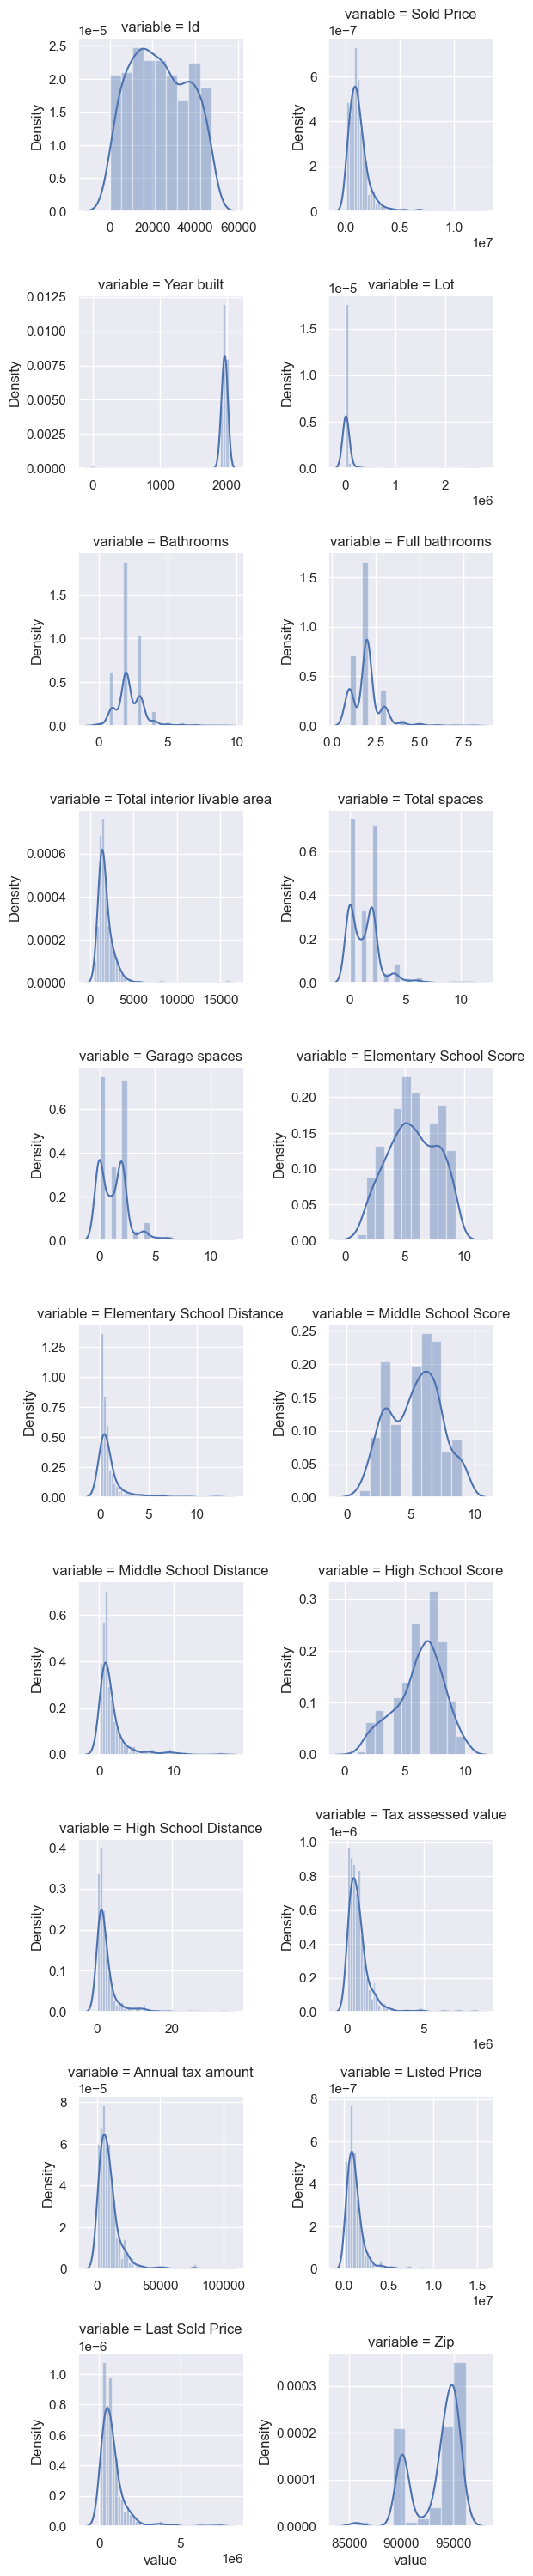

In [62]:
f = pd.melt(train_data, value_vars=numeric_features)  # 转换为长数据
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

4.2.4数字特征相互之间的关系可视化

In [63]:
train_data[numeric_features]

,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
0,10391,1715000.0,1999.0,5662.8,3.0,NaN,2750.0,3.0,3.0,6.0,0.3,5.0,1.5,5.0,0.5,1611000.0,17878.0,1680000.0,1375000.0,94080
1,38445,1856500.0,2017.0,2692.0,3.0,3.0,2165.0,2.0,2.0,6.0,0.2,7.0,1.4,7.0,1.5,1849827.0,22949.0,1799000.0,1778000.0,95032
2,27058,1100000.0,1963.0,6599.0,2.0,2.0,1188.0,2.0,2.0,4.0,0.4,5.0,0.7,7.0,0.6,134573.0,2804.0,1039900.0,NaN,95118
3,21222,150000.0,2007.0,11325.6,2.0,2.0,1133.0,2.0,2.0,5.0,4.2,6.0,6.5,5.0,4.4,84112.0,896.0,150000.0,80000.0,85648
4,24578,1182000.0,1955.0,6080.0,2.0,2.0,1556.0,2.0,2.0,4.0,0.4,4.0,1.5,5.0,0.7,731883.0,10210.0,1188888.0,650000.0,95053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,20271,1048000.0,1977.0,2613600.0,7.0,5.0,5798.0,7.0,7.0,4.0,9.4,NaN,NaN,6.0,10.4,411744.0,4605.0,1600000.0,NaN,95225
496,1678,1000000.0,1971.0,6255.0,2.0,2.0,1616.0,2.0,2.0,5.0,0.2,7.0,0.9,9.0,1.2,601910.0,9492.0,950000.0,463000.0,95148
497,9214,101000.0,1954.0,10030.0,2.0,NaN,1651.0,2.0,2.0,5.0,0.3,5.0,0.8,6.0,0.8,1417956.0,17819.0,1049000.0,249000.0,95125
498,13818,649999.0,1983.0,871.0,2.0,1.0,1233.0,0.0,0.0,4.0,0.5,NaN,NaN,7.0,3.4,611665.0,7482.0,649999.0,489500.0,95003


3.1.2 散点图-plt.scatter()或sns.jointplot()
散点图（scatter plot）将两个数值变量的值显示为二维空间中的笛卡尔坐标（Cartesian coordinate）。seaborn 库的  jointplot() 方法在绘制散点图的同时会绘制两张直方图，某些情形下它们可能会更有用。



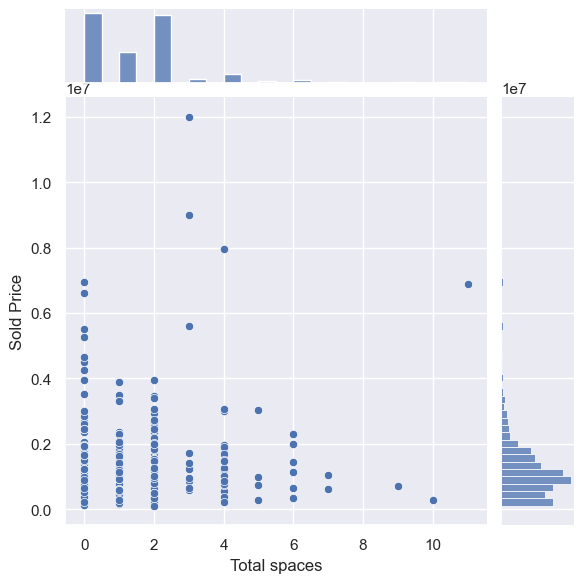

In [64]:
sns.jointplot(x='Total spaces', y='Sold Price', data=train_data, kind='scatter')

d:\CondaPyEnvs\seaborn\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


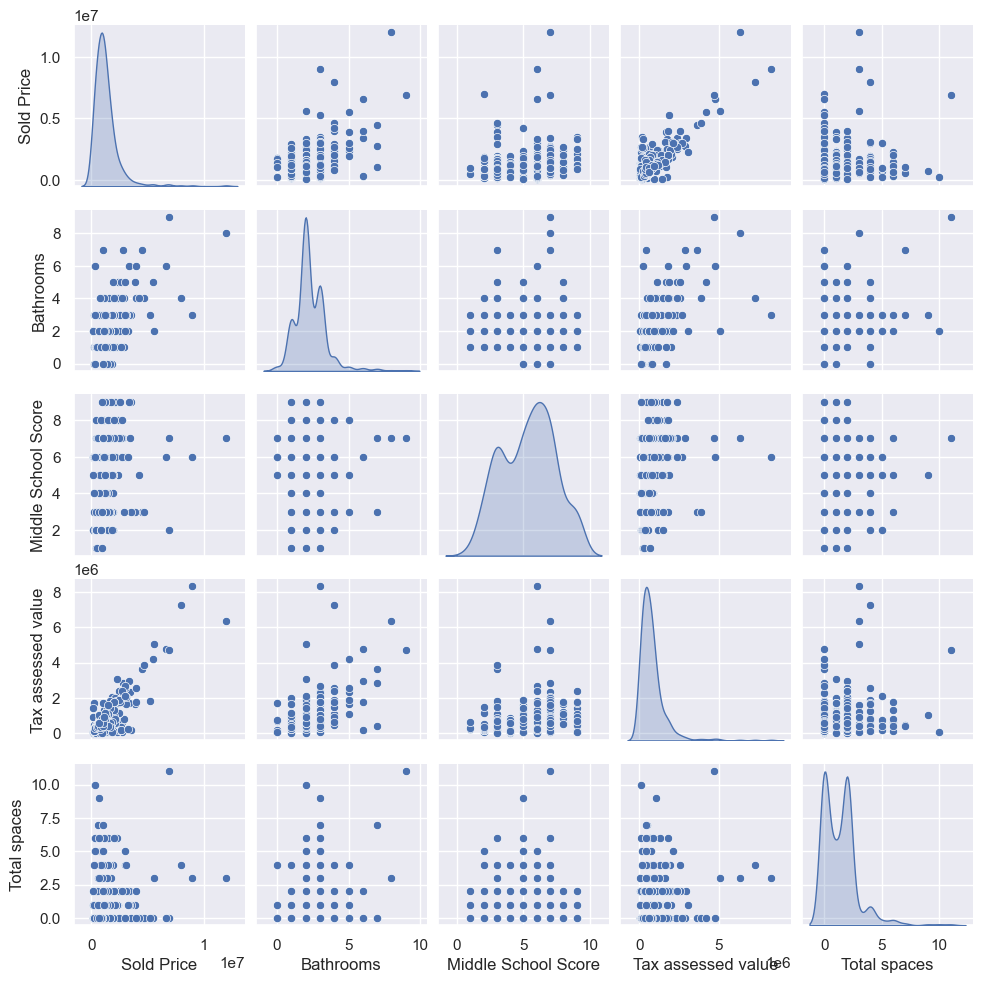

In [65]:
sns.set()
columns = ['Sold Price','Bathrooms','Middle School Score','Tax assessed value','Total spaces']
sns.pairplot(train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

4.2.5多变量互相回归关系可视化

_, axes= plt.subplots( 1, 4, sharey=True, figsize=(10,4))
sns.boxplot(data = train_data['Sold Price'], ax = axes[0])
sns.violinplot(data = train_data['Sold Price'], ax= axes[1])
sns.boxplot(x = 'Bathrooms', y = 'Sold Price', data=train_data, ax = axes[2])
sns.violinplot(x = 'Bathrooms', y = 'Sold Price', data=train_data, ax= axes[3])

<Axes: xlabel='Total spaces', ylabel='Sold Price'>

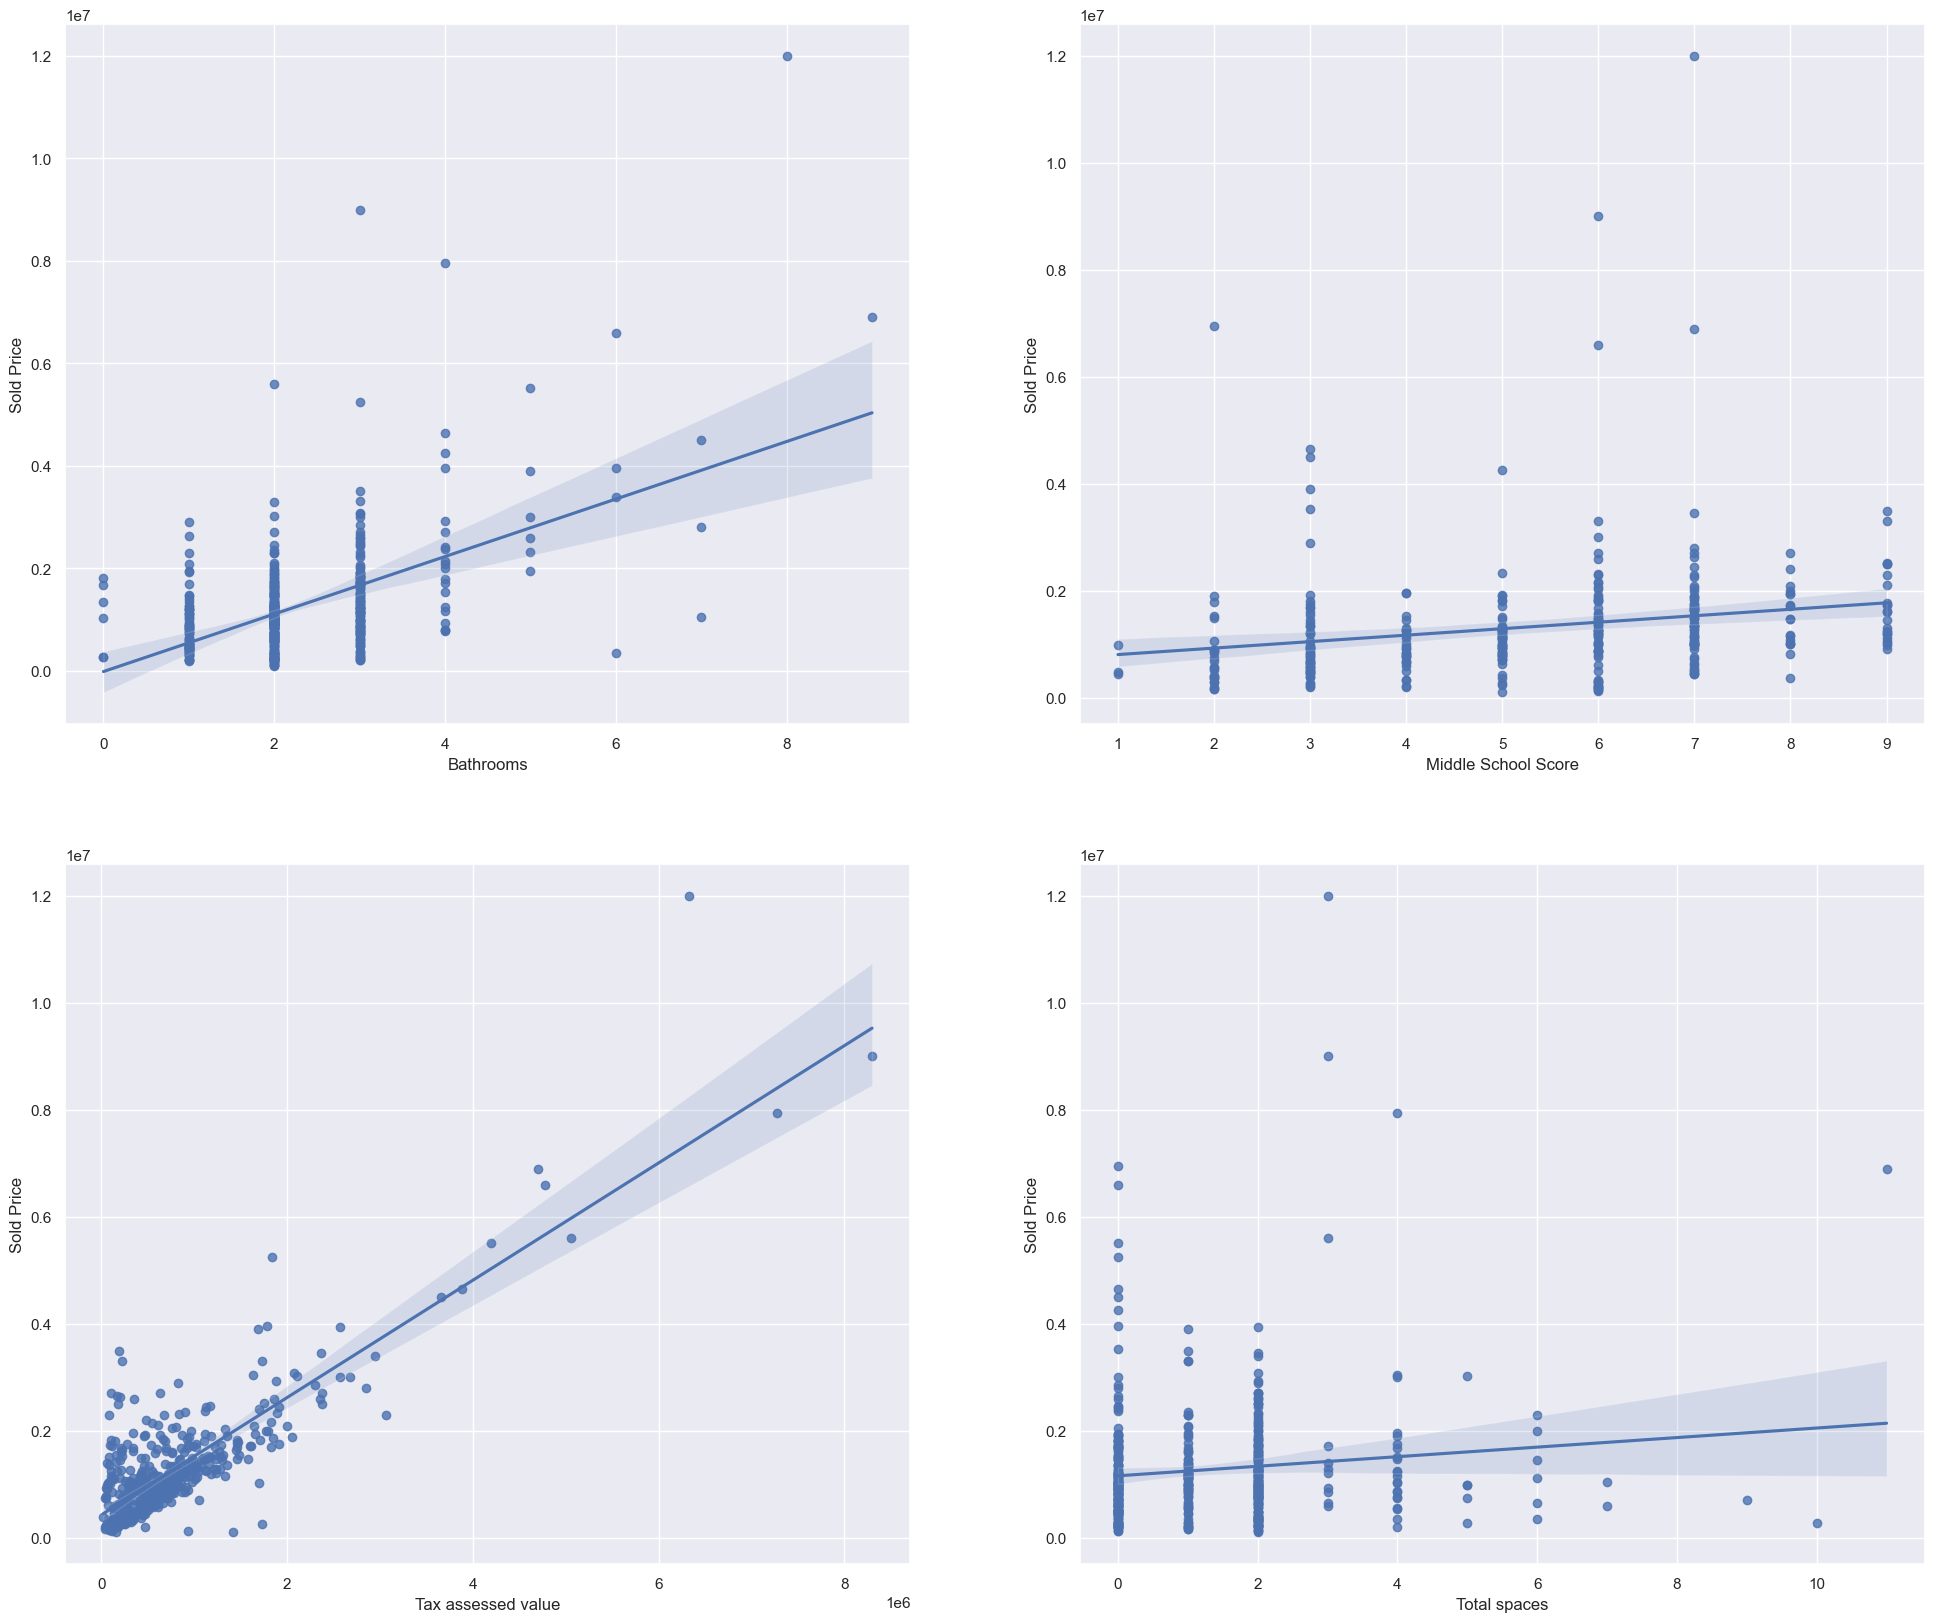

In [66]:

#fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14', 'v_13']  #选取相关性强度前十的变量
#v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='Bathrooms',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=axes[0,0])
sns.regplot(x='Middle School Score',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=axes[0,1])
sns.regplot(x='Tax assessed value',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=axes[1,0])
sns.regplot(x='Total spaces',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=axes[1,1])



<Axes: xlabel='Total spaces', ylabel='Sold Price'>

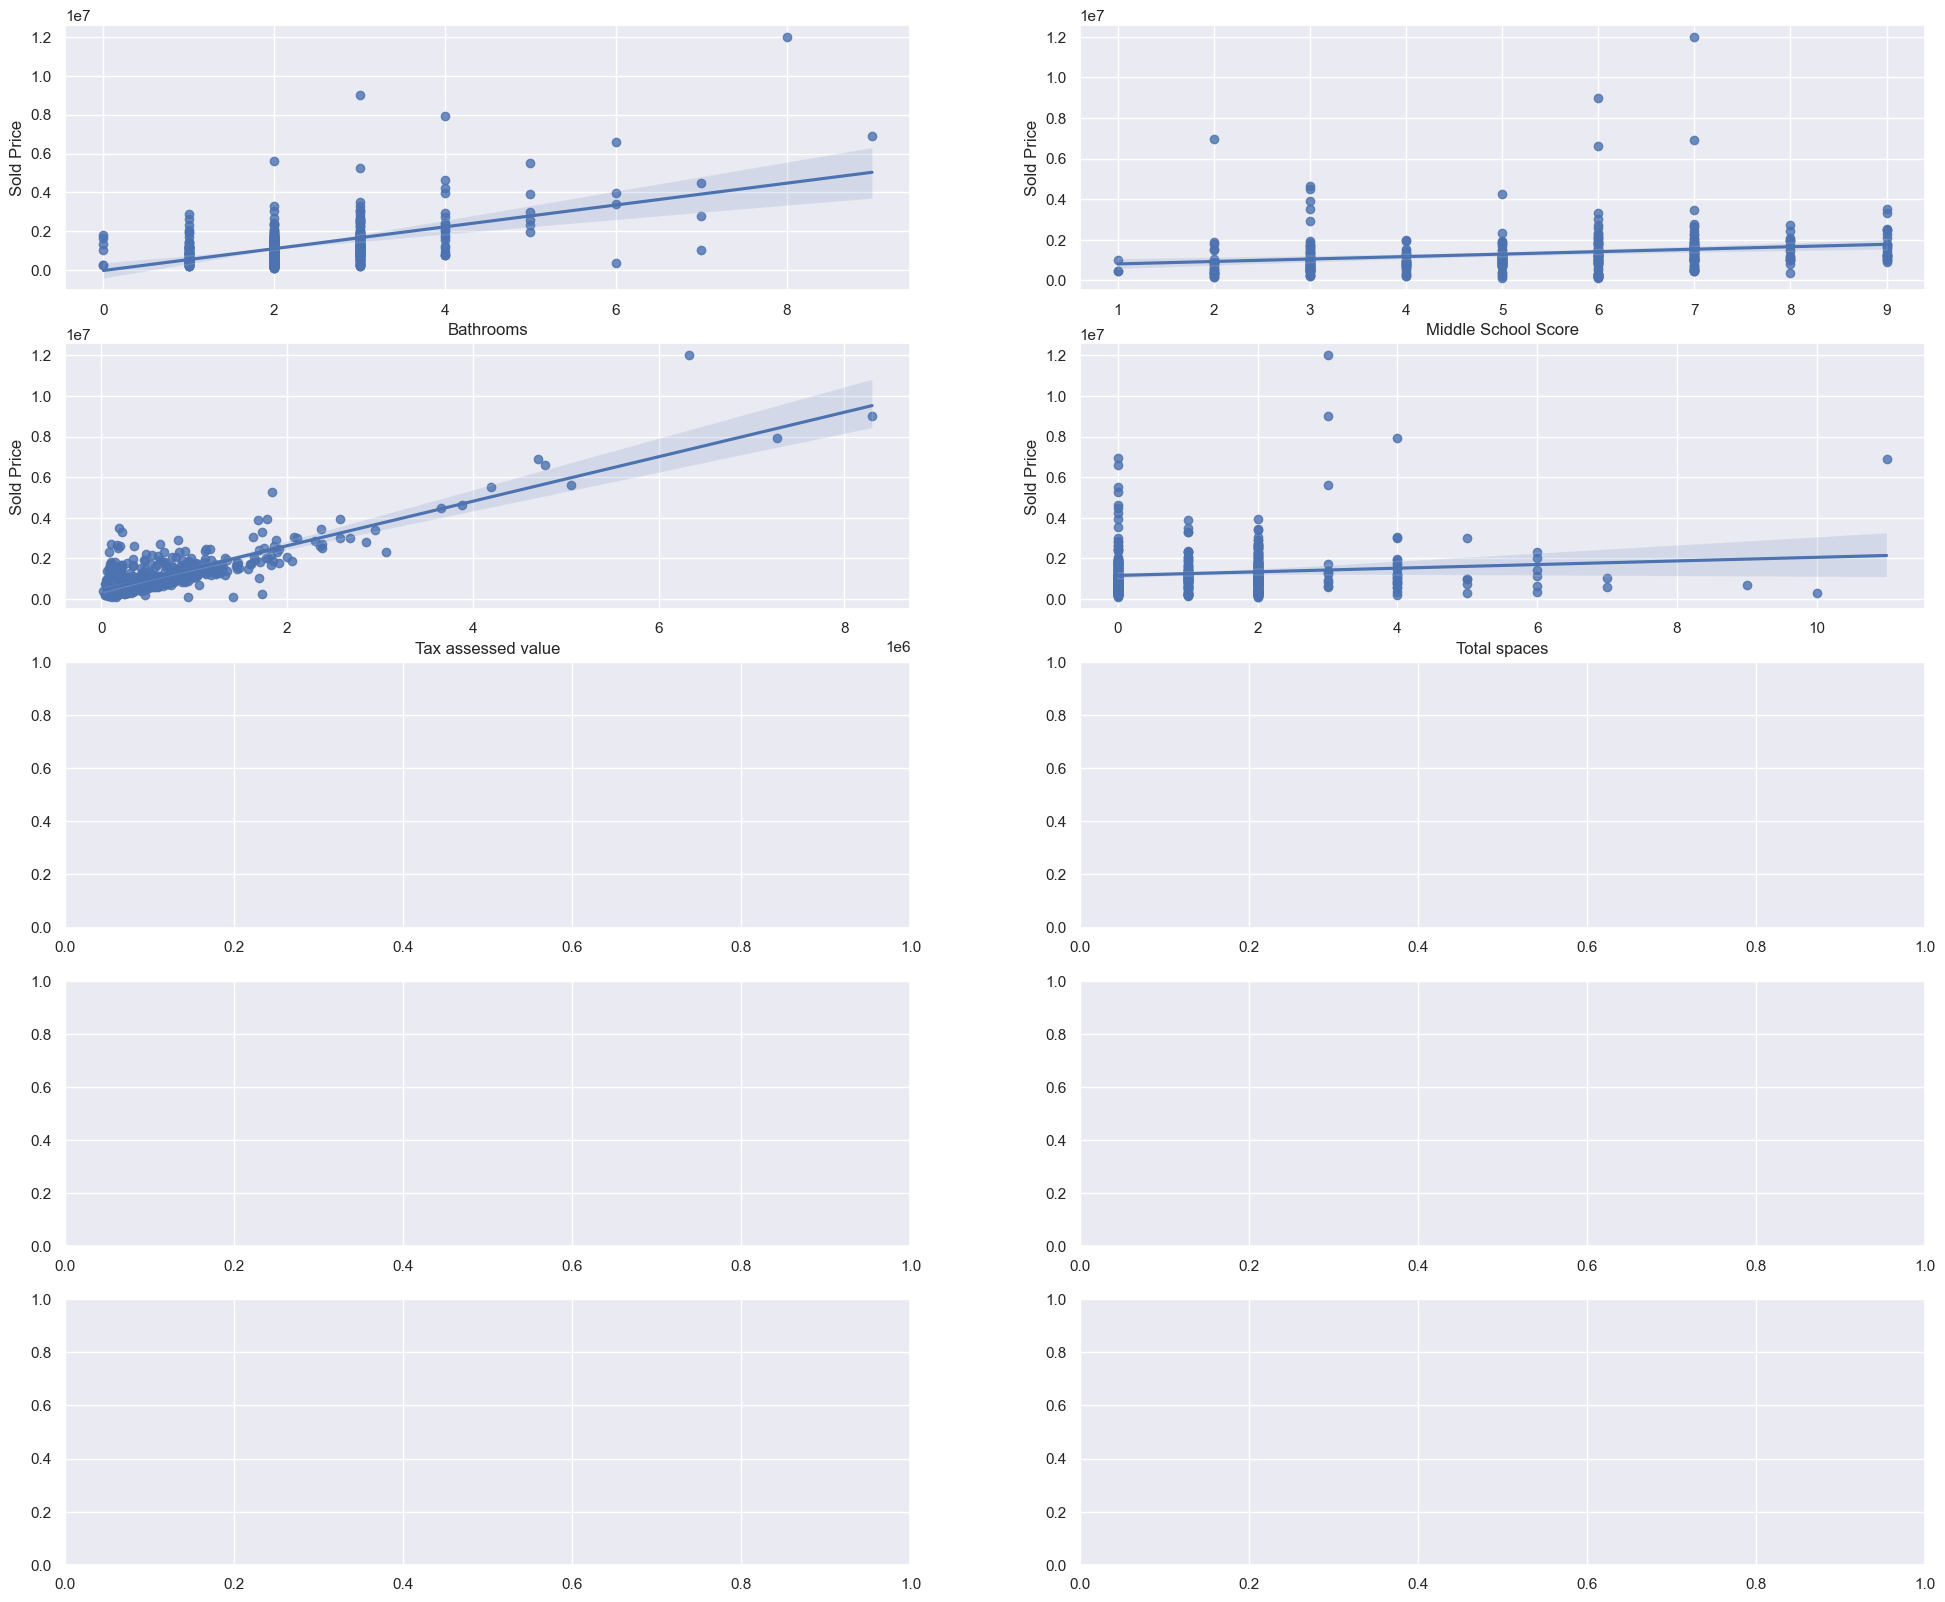

In [67]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))

sns.regplot(x='Bathrooms',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=ax1)
sns.regplot(x='Middle School Score',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=ax2)
sns.regplot(x='Tax assessed value',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=ax3)
sns.regplot(x='Total spaces',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=ax4)